**ADVANCED MACHINE LEARNING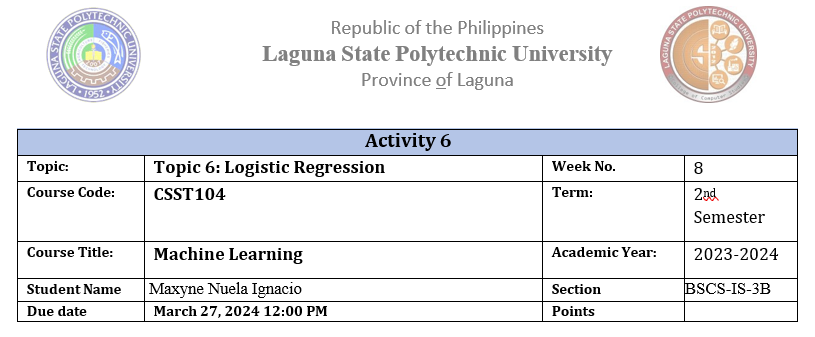**

**Topic 6:** Logistic Regression

**Student Name:** Maxyne Nuela Ignacio

**Year & Section:** BS Computer Science - IS - 3B

# **Part 1: Data Loading and Preprocessing**

**1.	Load the Dataset: Import the dataset using Pandas and display the first few rows to understand its structure.**

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer

data = pd.read_csv('onlinefoods.csv')
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
   Age  Gender Marital Status Occupation  Monthly Income  \
0   20  Female         Single    Student       No Income   
1   24  Female         Single    Student  Below Rs.10000   
2   22    Male         Single    Student  Below Rs.10000   
3   22  Female         Single    Student       No Income   
4   22    Male         Single    Student  Below Rs.10000   

  Educational Qualifications  Family size  latitude  longitude  Pin code  \
0              Post Graduate            4   12.9766    77.5993    560001   
1                   Graduate            3   12.9770    77.5773    560009   
2              Post Graduate            3   12.9551    77.6593    560017   
3                   Graduate            6   12.9473    77.5616    560019   
4              Post Graduate            4   12.9850    77.5533    560010   

  Output   Feedback Unnamed: 12  
0    Yes   Positive         Yes  
1    Yes   Positive         Yes  
2    Yes  Negative          Yes  
3    Yes   Posi

**2.	Handle Missing Values: Identify and handle any missing values in the dataset. Choose an appropriate strategy (e.g., imputation or removal) based on the context.**

In [64]:
missing_values = data.isnull().sum()
print("\nMissing values:\n", missing_values)
# Check if any NaN values are left after imputation
print("NaN values in X_train after imputation:", np.isnan(X_train_imputed).sum())
print("NaN values in X_test after imputation:", np.isnan(X_test_imputed).sum())

# Print rows with missing values
print("Rows with missing values in X_train:")
print(X_train[X_train.isnull().any(axis=1)])

print("Rows with missing values in X_test:")
print(X_test[X_test.isnull().any(axis=1)])

data.fillna(data.mean(), inplace=True)
data.fillna(data.mode().iloc[0], inplace=True)
missing_values_after = data.isnull().sum()
print("\nMissing values after handling:\n", missing_values_after)


Missing values:
 Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64
NaN values in X_train after imputation: 0
NaN values in X_test after imputation: 0
Rows with missing values in X_train:
     Age  Monthly Income  Family size  latitude  longitude  Pin code  \
63    23             NaN            4   12.9343    77.6044    560029   
238   27             NaN            2   12.8845    77.6036    560076   
132   23             NaN            2   13.0019    77.5713    560003   
101   23             NaN            2   12.9442    77.6076    560030   
351   25             NaN            2   12.9783    77.6408    560038   
.

<ipython-input-64-e0f861a1c0da>:14: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


**3.	Encode Categorical Variables: Convert categorical variables into a numeric format suitable for logistic regression. Consider techniques like one-hot encoding or label encoding.**

In [4]:
data_encoded = pd.get_dummies(data, columns=['Gender', 'Marital Status', 'Occupation'])

**4.	Feature Selection: Identify which features to include in the model. Justify your selections based on the dataset's context and preliminary analysis.**

In [6]:
# Selecting features
selected_features = ['Age', 'Monthly Income', 'Gender_Female', 'Gender_Male','Marital Status_Married', 'Marital Status_Single', 'Feedback']

# Creating a new dataframe with selected features
data_final = data_encoded[selected_features]

# Displaying the final preprocessed dataset
print("\nFinal preprocessed dataset:")
print(data_final.head())


Final preprocessed dataset:
   Age  Monthly Income  Gender_Female  Gender_Male  Marital Status_Married  \
0   20       No Income              1            0                       0   
1   24  Below Rs.10000              1            0                       0   
2   22  Below Rs.10000              0            1                       0   
3   22       No Income              1            0                       0   
4   22  Below Rs.10000              0            1                       0   

   Marital Status_Single   Feedback  
0                      1   Positive  
1                      1   Positive  
2                      1  Negative   
3                      1   Positive  
4                      1   Positive  


# **Part 2: Exploratory Data Analysis (EDA)**

**1.	Descriptive Statistics: Use .describe() to summarize the numeric columns. Highlight any interesting findings.**

In [7]:
# Using .describe() to summarize numeric columns
numeric_summary = data_final.describe()

# Displaying descriptive statistics
print("Descriptive Statistics for Numeric Columns:")
print(numeric_summary)

Descriptive Statistics for Numeric Columns:
              Age  Gender_Female  Gender_Male  Marital Status_Married  \
count  388.000000     388.000000   388.000000              388.000000   
mean    24.628866       0.427835     0.572165                0.278351   
std      2.975593       0.495404     0.495404                0.448766   
min     18.000000       0.000000     0.000000                0.000000   
25%     23.000000       0.000000     0.000000                0.000000   
50%     24.000000       0.000000     1.000000                0.000000   
75%     26.000000       1.000000     1.000000                1.000000   
max     33.000000       1.000000     1.000000                1.000000   

       Marital Status_Single  
count             388.000000  
mean                0.690722  
std                 0.462793  
min                 0.000000  
25%                 0.000000  
50%                 1.000000  
75%                 1.000000  
max                 1.000000  


**2.	Visualizations: Create visualizations to understand the relationships between features and the target variable. Suggestions include:**

•	Distribution of Age and its impact on Feedback.

•	Proportions of Feedback across different levels of Monthly Income.

•	Correlation matrix heatmap to identify any interesting correlations between features.


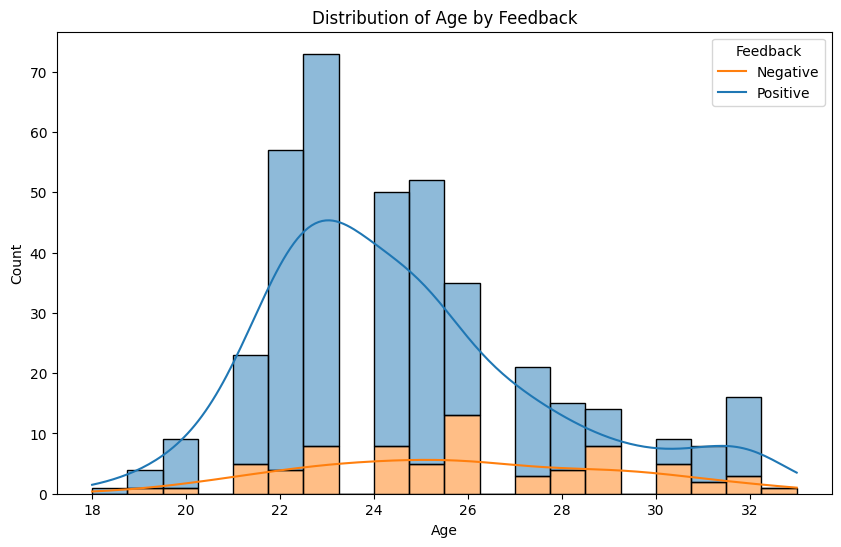

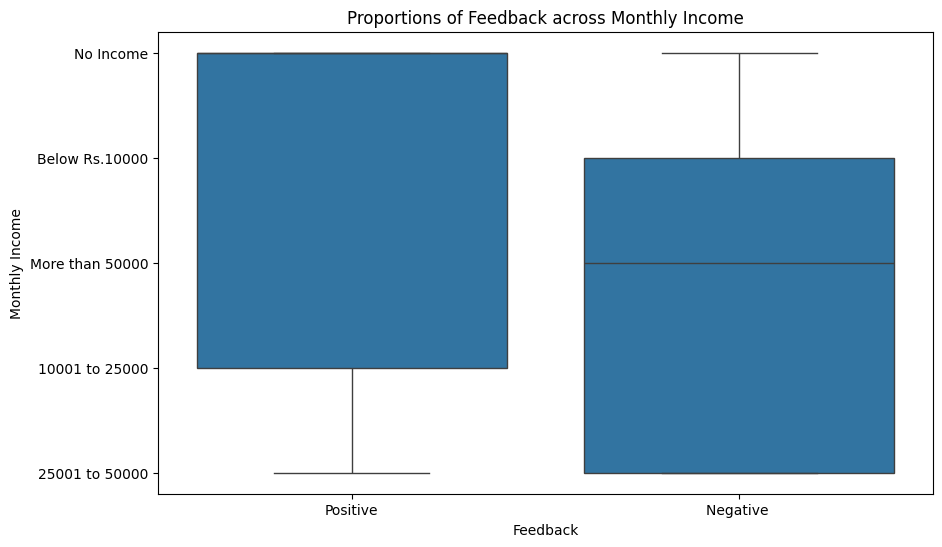

<ipython-input-10-20bab7dfeb0d>:20: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_final.corr()


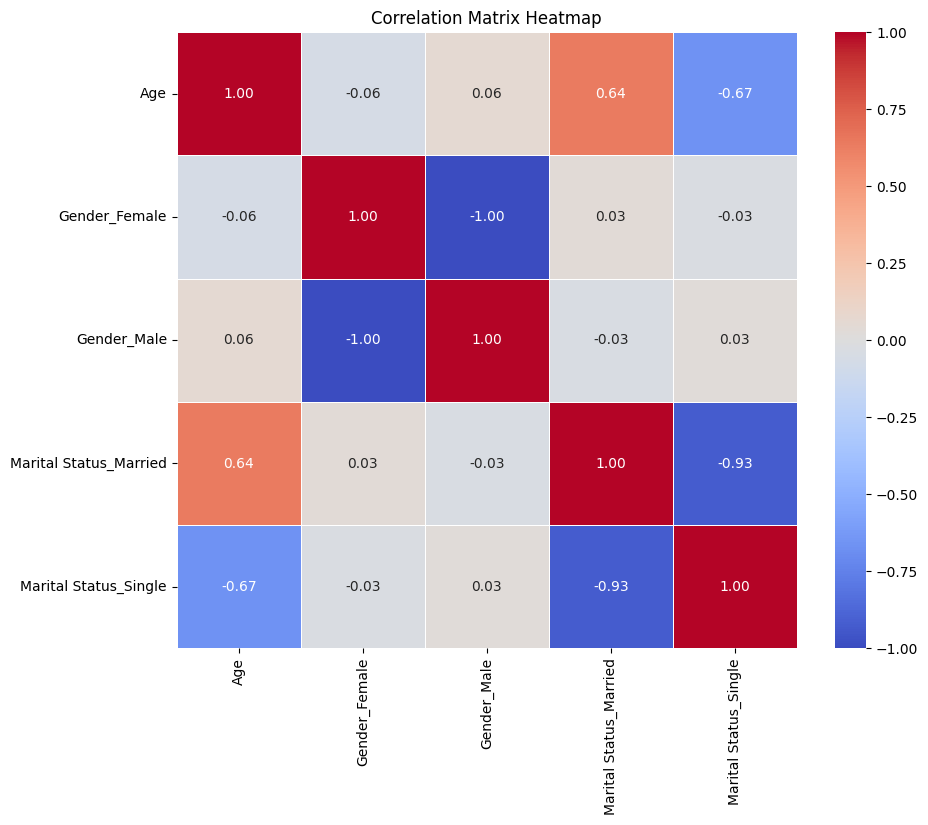

In [10]:
# Distribution of Age and its impact on Feedback
plt.figure(figsize=(10, 6))
sns.histplot(data=data_final, x='Age', hue='Feedback', bins=20, kde=True, multiple='stack')
plt.title('Distribution of Age by Feedback')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Feedback', labels=['Negative', 'Positive'])
plt.show()

# Proportions of Feedback across different levels of Monthly Income
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_final, x='Feedback', y='Monthly Income')
plt.title('Proportions of Feedback across Monthly Income')
plt.xlabel('Feedback')
plt.ylabel('Monthly Income')
plt.show()

# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data_final.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# **Part 3: Logistic Regression Model**

**1.	Build the Model: Implement a logistic regression model using scikit-learn. Split your data into training and test sets to evaluate the model's performance.**

In [53]:
from sklearn.model_selection import train_test_split
print(data_encoded.columns)

# Splitting the data into features (X) and target variable (y)
X = data_encoded.drop(columns=['Feedback'])
y = data_encoded['Feedback']

# Splitting the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Index(['Age', 'Monthly Income', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Feedback', 'Gender_Female', 'Gender_Male',
       'Marital Status_Married', 'Marital Status_Prefer not to say',
       'Marital Status_Single', 'Occupation_Employee', 'Occupation_House wife',
       'Occupation_Self Employeed', 'Occupation_Student',
       'Educational Qualifications_Graduate',
       'Educational Qualifications_Ph.D',
       'Educational Qualifications_Post Graduate',
       'Educational Qualifications_School',
       'Educational Qualifications_Uneducated'],
      dtype='object')


**2.	Model Evaluation: Assess your model's performance using appropriate metrics, such as accuracy, precision, recall, and the confusion matrix. Discuss the results.**

In [87]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Separate features (X) and target variable (y)
X = data.drop(columns=['Feedback'])  # Features
y = data['Feedback']  # Target variable

# Identify numeric and categorical columns
numeric_cols = X.select_dtypes(include=['number']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Define preprocessing steps for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # You can also use 'constant' strategy here
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Apply transformations to all columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the logistic regression model pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression())])

pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Positive')
recall = recall_score(y_test, y_pred, pos_label='Positive')

conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:")
print(conf_matrix)





Accuracy: 0.8589743589743589
Precision: 0.9117647058823529
Recall: 0.9253731343283582
Confusion Matrix:
[[ 5  6]
 [ 5 62]]


# **Part 4: Data Analysis and Visualization**

**1.	Feature Importance: Analyze and visualize the importance of different features in your logistic regression model. Discuss how each feature influences the prediction of Feedback.**


Summary statistics:
              Age  Family size    latitude   longitude       Pin code
count  388.000000   388.000000  388.000000  388.000000     388.000000
mean    24.628866     3.280928   12.972058   77.600160  560040.113402
std      2.975593     1.351025    0.044489    0.051354      31.399609
min     18.000000     1.000000   12.865200   77.484200  560001.000000
25%     23.000000     2.000000   12.936900   77.565275  560010.750000
50%     24.000000     3.000000   12.977000   77.592100  560033.500000
75%     26.000000     4.000000   12.997025   77.630900  560068.000000
max     33.000000     6.000000   13.102000   77.758200  560109.000000


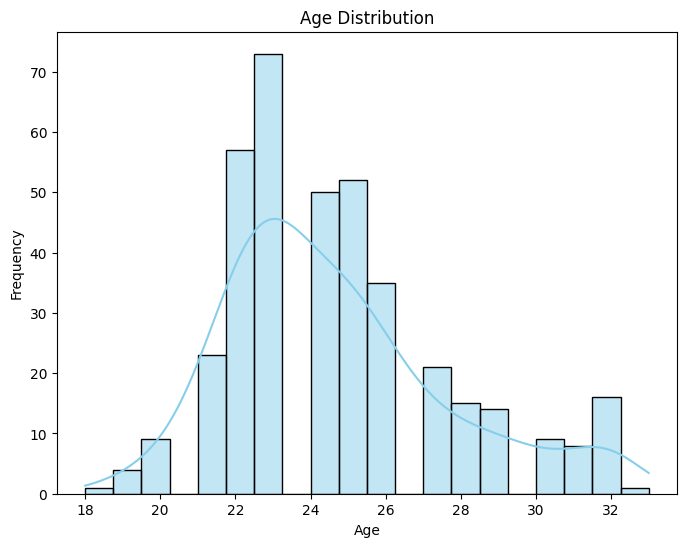

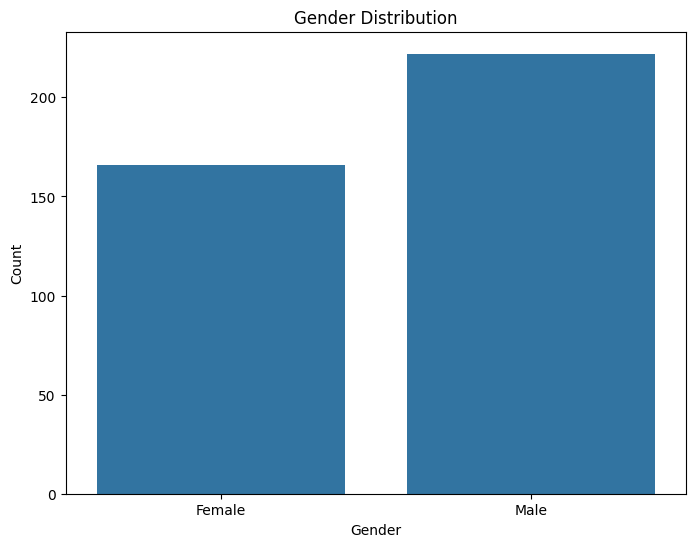

<ipython-input-95-5fa5bcb3a781>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Gender', y='Monthly Income', palette='Set3')


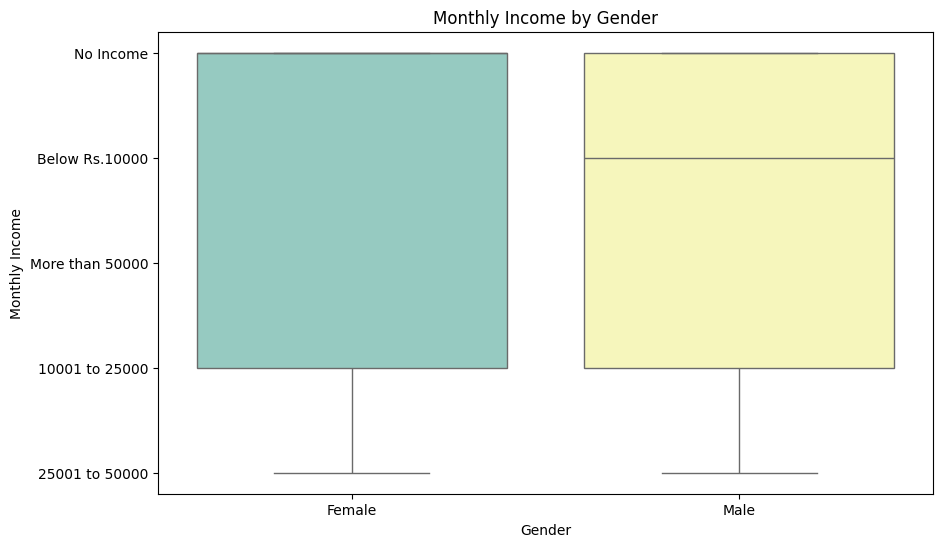

In [95]:
# Summary statistics
print("\nSummary statistics:")
print(data.describe())

# Histogram of Age distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Count plot of Gender
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Gender')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

#Box plot of Monthly Income by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Gender', y='Monthly Income', palette='Set3')
plt.title('Monthly Income by Gender')
plt.xlabel('Gender')
plt.ylabel('Monthly Income')
plt.show()


**2.	Prediction Insights: Visualize the distribution of predicted probabilities. Discuss any patterns or insights you can derive from how the model makes predictions.**

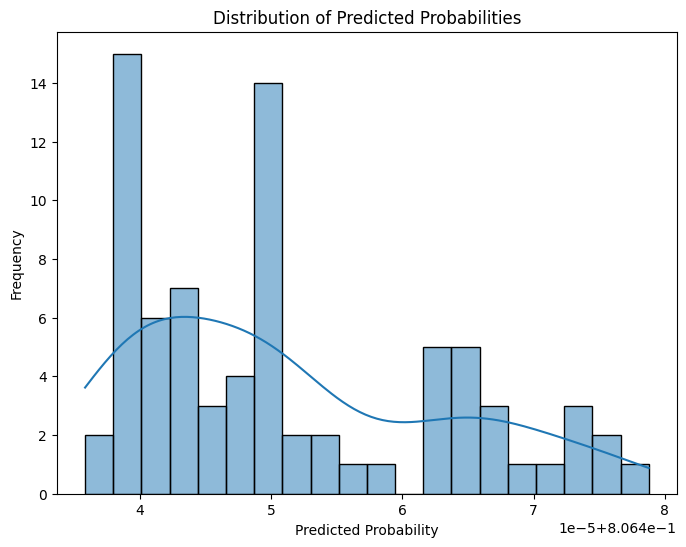

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Assuming X_train is your training data
# Assuming X_test is your test data

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate over each column in X_train and X_test
for col in X_train.columns:
    # Check if the column is categorical
    if X_train[col].dtype == 'object':
        # Fit label encoder on training data and transform both training and test data
        X_train[col] = label_encoder.fit_transform(X_train[col])
        X_test[col] = label_encoder.transform(X_test[col])

# Now, train your logistic regression model and proceed with prediction as before

# Assuming logistic_model is your trained logistic regression model
# X_train is your training data
# y_train is your training labels
# X_test is your test data

# Train the logistic regression model
logistic_model.fit(X_train, y_train)

plt.figure(figsize=(8, 6))

# Predict probabilities
y_pred_prob = logistic_model.predict_proba(X_test)

# Extract probabilities for the positive class (assuming positive class is labeled as 1)
y_pred_prob_positive = y_pred_prob[:, 1]

sns.histplot(y_pred_prob_positive, bins=20, kde=True)
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.show()
